# Predicting Car Prices

k近傍法を用いて、車の価格を予測する

In [1]:
import pandas as pd
import numpy as np

header = (["symboling", "normalized_losses", "make","fuel_type",
           "aspiration","num_doors","body_style","drive_wheels",
           "engine_location", "wheel_base", "length","width", 
           "height","curb_weight", "engine_type","num_cylinders",
           "engine_size","fuel_system","bore", "stroke", 
           "compression_ratio", "horsepower", "peak_rpm", 
           "city_mpg","highway_mpg", "price"])
cars = pd.read_csv("imports-85.data", names = header) 
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


必要なコラムは連続的な数値データを持つものだけであり、かつ、target columnは`price`である。[当サイト](https://archive.ics.uci.edu/ml/datasets/automobile)を参考にする。

In [2]:
continuous_val_cols = (["normalized_losses", "wheel_base", "length","width", 
           "height","curb_weight","bore", "stroke", 
           "compression_ratio", "horsepower", "peak_rpm", 
           "city_mpg","highway_mpg", "price"])

In [3]:
numeric_cars = cars[continuous_val_cols]
numeric_cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


# Data Cleaning

In [4]:
numeric_cars = numeric_cars.replace("?", np.nan)
print(numeric_cars.dtypes)
print(numeric_cars.shape)

normalized_losses     object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object
(205, 14)


In [5]:
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

target columnである`price`の値がnp.nanで行を除く。

In [6]:
numeric_cars = numeric_cars.dropna(subset=["price"])
numeric_cars.isnull().sum()

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

欠損値を各コラムの平均値に代える。

In [7]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

全ての数値を標準化する、すなわち、[0,1]の値に変換する。

In [8]:
price_col = numeric_cars['price']

numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col
numeric_cars

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.125000,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.187500,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.062500,0.313084,0.551020,0.138889,0.157895,17450.0
5,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,15250.0
6,0.486911,0.559767,0.770149,0.948718,0.658333,0.525989,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,17710.0
7,0.298429,0.559767,0.770149,0.948718,0.658333,0.568658,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,18920.0
8,0.486911,0.559767,0.770149,0.948718,0.675000,0.619860,0.421429,0.633333,0.081250,0.429907,0.551020,0.111111,0.105263,23875.0
10,0.664921,0.425656,0.532836,0.384615,0.541667,0.351823,0.685714,0.347619,0.112500,0.247664,0.673469,0.277778,0.342105,16430.0


# Univariate Model

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(feature_columns, target_column, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    shuffle_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle_index)
    
    last_train_row = int(len(rand_df) / 2)
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    knn.fit(train_df[[feature_columns]], train_df[target_column])
    prediction = knn.predict(test_df[[feature_columns]])
    
    mse = mean_squared_error(test_df[target_column], prediction)
    rmse = mse ** (1/2)
    return rmse

In [10]:
rmse_result = {}
feature_columns = numeric_cars.columns.drop('price').tolist()

for col in feature_columns:
    rmse = knn_train_test(col, 'price', numeric_cars)
    rmse_result[col] = rmse

rmse_result_series = pd.Series(rmse_result)
rmse_result_series.sort_values()

horsepower           4037.037713
curb_weight          4401.118255
highway_mpg          4630.026799
width                4704.482590
city_mpg             4766.422505
length               5427.200961
wheel_base           5461.553998
compression_ratio    6610.812153
bore                 6780.627785
normalized_losses    7330.197653
peak_rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

k = [1, 3, 5, 7, 9]として、rmseの値の変化を調べる。

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

In [12]:
k_rmse_result = {}
feature_cols = numeric_cars.columns.drop('price')

for col in feature_cols:
    k_rmse = knn_train_test(col, 'price', numeric_cars)
    k_rmse_result[col] = k_rmse

k_rmse_result

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city_mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression_ratio': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb_weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway_mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.811860277134,
  9: 4515.135617419103},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
 

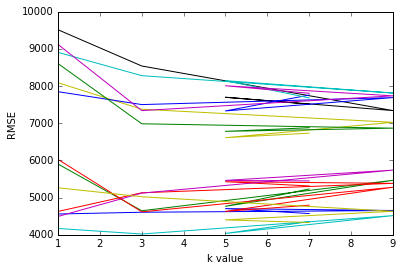

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_result.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

# Multivariate Model

In [14]:
feature_avg_rmse = {}

for k,v in k_rmse_result.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
    
avg_rmse_series = pd.Series(feature_avg_rmse)
avg_rmse_series.sort_values()  

horsepower           4219.377860
width                4618.910560
curb_weight          4730.075815
highway_mpg          5069.469256
length               5176.394904
city_mpg             5202.409003
wheel_base           5252.392462
compression_ratio    7166.073599
bore                 7222.472445
normalized_losses    7624.407151
stroke               8000.240467
peak_rpm             8119.365233
height               8163.346266
dtype: float64

In [15]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

In [16]:
k_rmse_results = {}

two_best_features = ["horsepower", "width"]
rmse_val = knn_train_test(two_best_features, "price", numeric_cars)
k_rmse_results["two_best_features"] = rmse_val

three_best_features = ["horsepower", "width", "curb_weight"]
rmse_val = knn_train_test(three_best_features, "price", numeric_cars)
k_rmse_results["three_best_features"] = rmse_val

four_best_features = ["horsepower", "width", "curb_weight", "highway_mpg"]
rmse_val = knn_train_test(four_best_features, "price", numeric_cars)
k_rmse_results["four_best_features"] = rmse_val

five_best_features = ["horsepower", "width", "curb_weight", "highway_mpg", "length"]
rmse_val = knn_train_test(five_best_features, "price", numeric_cars)
k_rmse_results["five_best_features"] = rmse_val

k_rmse_results

{'five_best_features': {5: 3665.546673045813},
 'four_best_features': {5: 3358.6915801682458},
 'three_best_features': {5: 3305.9401397969677},
 'two_best_features': {5: 3589.3132622073304}}

# Hyperparameter Tuning

In [17]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = range(1,26)
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

hp_rmse_results = {}

three_best_features = ["horsepower", "width", "curb_weight"]
rmse_val = knn_train_test(three_best_features, "price", numeric_cars)
hp_rmse_results["three_best_features"] = rmse_val

four_best_features = ["horsepower", "width", "curb_weight", "highway_mpg"]
rmse_val = knn_train_test(four_best_features, "price", numeric_cars)
hp_rmse_results["four_best_features"] = rmse_val

five_best_features = ["horsepower", "width", "curb_weight", "highway_mpg", "length"]
rmse_val = knn_train_test(five_best_features, "price", numeric_cars)
hp_rmse_results["five_best_features"] = rmse_val

hp_rmse_results

{'five_best_features': {1: 2773.8991269216394,
  2: 2936.079965592973,
  3: 3152.3415515178144,
  4: 3488.57822210674,
  5: 3665.546673045813,
  6: 3563.9910249785435,
  7: 3714.642677357888,
  8: 3927.6655582704293,
  9: 4074.724411578548,
  10: 4202.692919892065,
  11: 4228.8377103033245,
  12: 4280.7222580306225,
  13: 4323.694733441248,
  14: 4341.598003940922,
  15: 4381.910642108479,
  16: 4462.210967318207,
  17: 4512.666161759793,
  18: 4549.02427742861,
  19: 4625.542238703432,
  20: 4680.4075341436155,
  21: 4769.300287838951,
  22: 4813.1714929806085,
  23: 4871.956026848068,
  24: 4922.889655107399,
  25: 4962.858865731754},
 'four_best_features': {1: 2600.746383728188,
  2: 2725.4325072335123,
  3: 3108.8580314362966,
  4: 3217.3135209486827,
  5: 3358.6915801682458,
  6: 3633.1687033129465,
  7: 3896.127441396644,
  8: 4002.8383900652543,
  9: 4055.5309369929582,
  10: 4128.67807741542,
  11: 4249.827289347268,
  12: 4344.035898237492,
  13: 4402.995293166156,
  14: 4424.

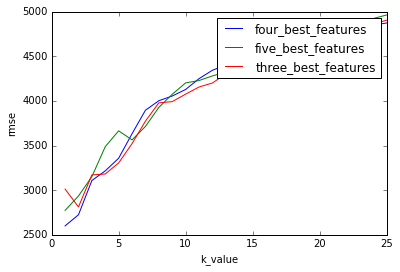

In [18]:
for k,v in hp_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y, label = k)
    plt.xlabel("k_value")
    plt.ylabel("rmse")
    plt.legend()